In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Crop_recommendation.csv')

In [7]:
print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", data.shape)
print(data.head())

✅ Dataset Loaded Successfully!
Shape of dataset: (2200, 8)
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
numeric_data = data.drop('label', axis=1)

In [10]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


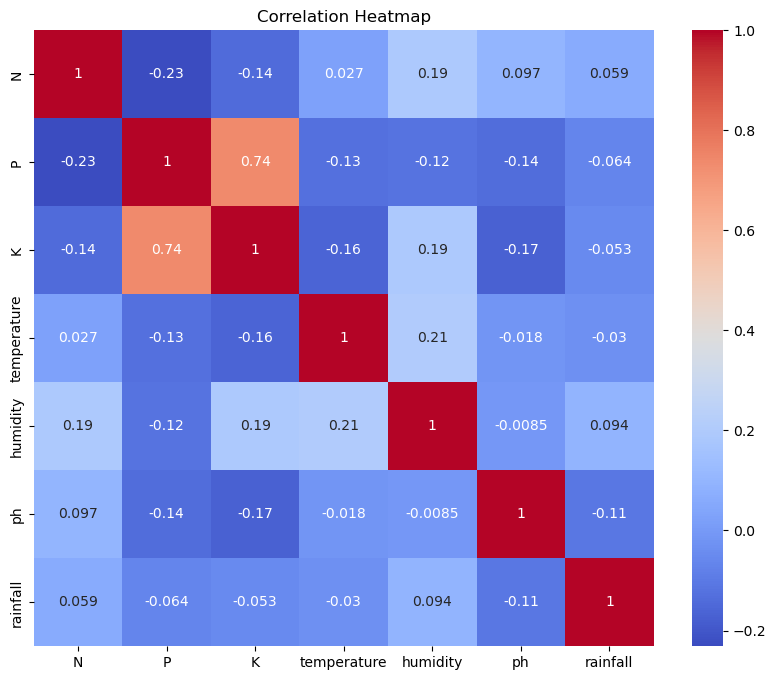

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
x= data.drop('label', axis=1)
y=data['label']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

In [32]:
import pandas as pd

sample_data = pd.DataFrame(
    [[80, 40, 40, 26, 80, 6.5, 200]],
    columns=['N','P','K','temperature','humidity','ph','rainfall']
)

prediction = model.predict(sample_data)
print("Recommended Crop:", prediction[0])


Recommended Crop: jute


In [16]:
import pickle
with open('crop_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [17]:
import pickle

with open('crop_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print(loaded_model.predict(sample_data))

['rice']


In [18]:
importances = model.feature_importances_
feature_names = ['N','P','K','temperature','humidity','ph','rainfall']

importance_data = pd.DataFrame({'Feature': feature_names, 'Imporatance': importances})
print(importance_data)

       Feature  Imporatance
0            N     0.109101
1            P     0.144366
2            K     0.177423
3  temperature     0.071641
4     humidity     0.212985
5           ph     0.054807
6     rainfall     0.229677


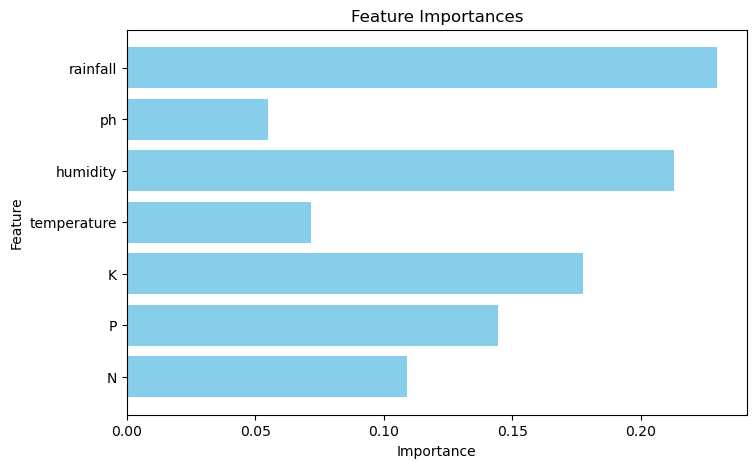

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


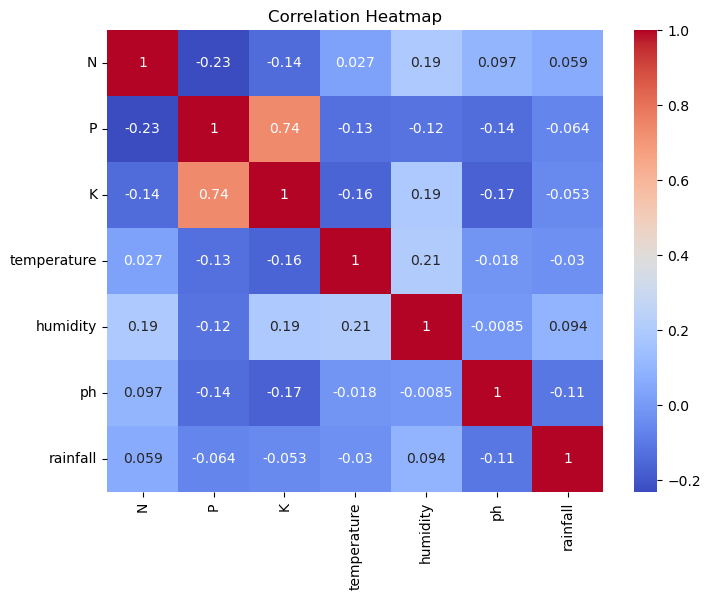

In [20]:
numeric_data = data.drop(columns=['label'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

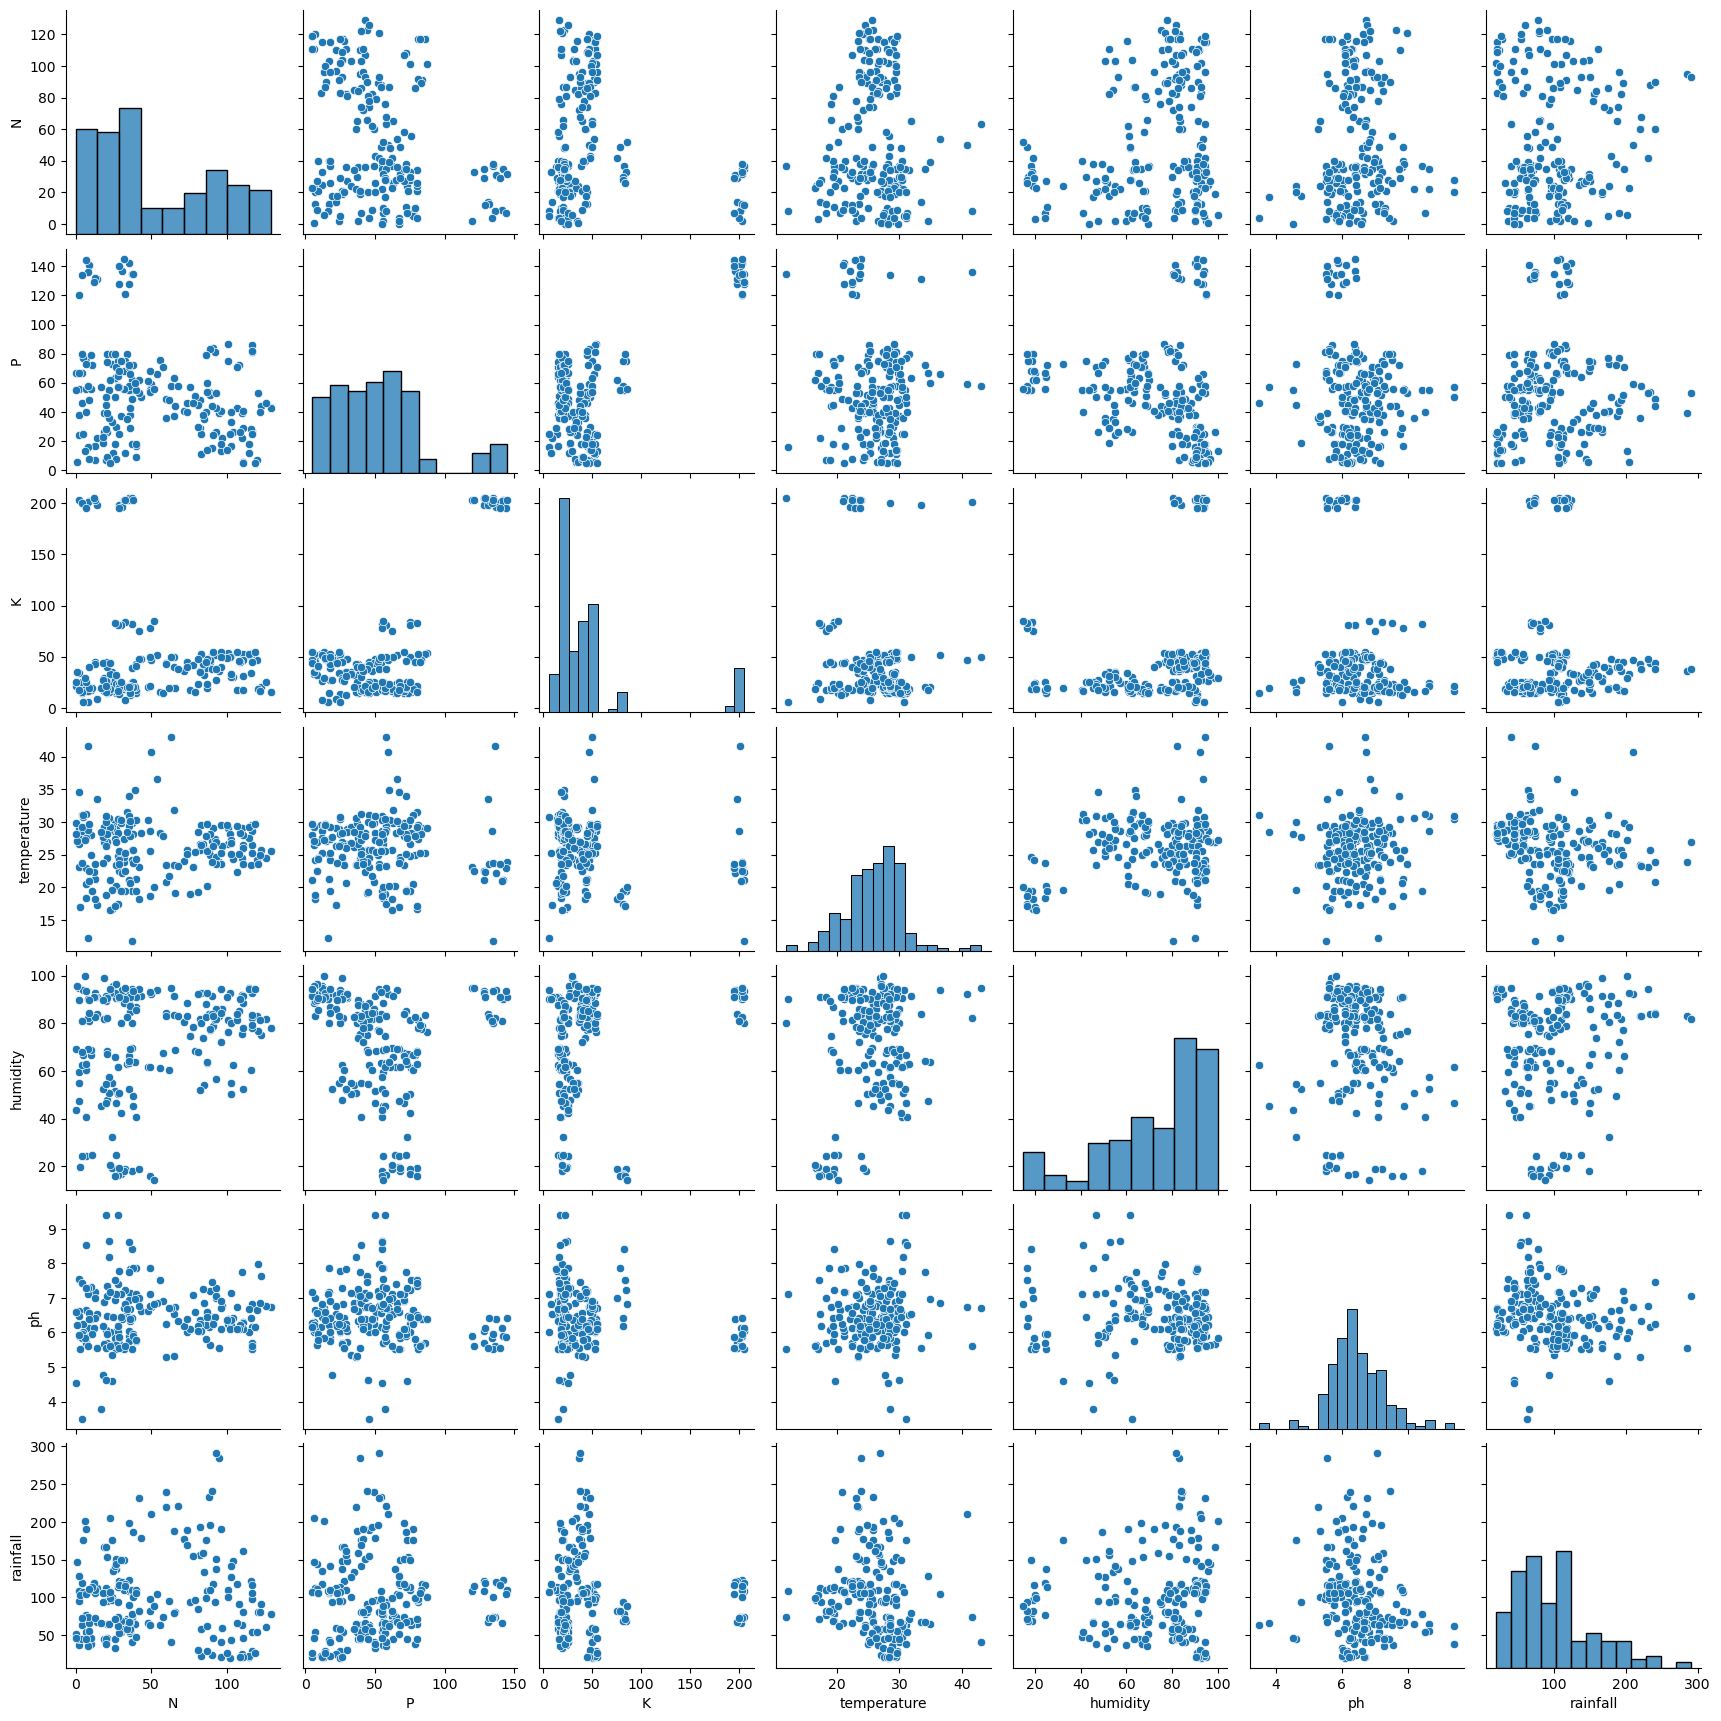

In [21]:
sns.pairplot(data.drop(columns=['label']).sample(200))
plt.show()

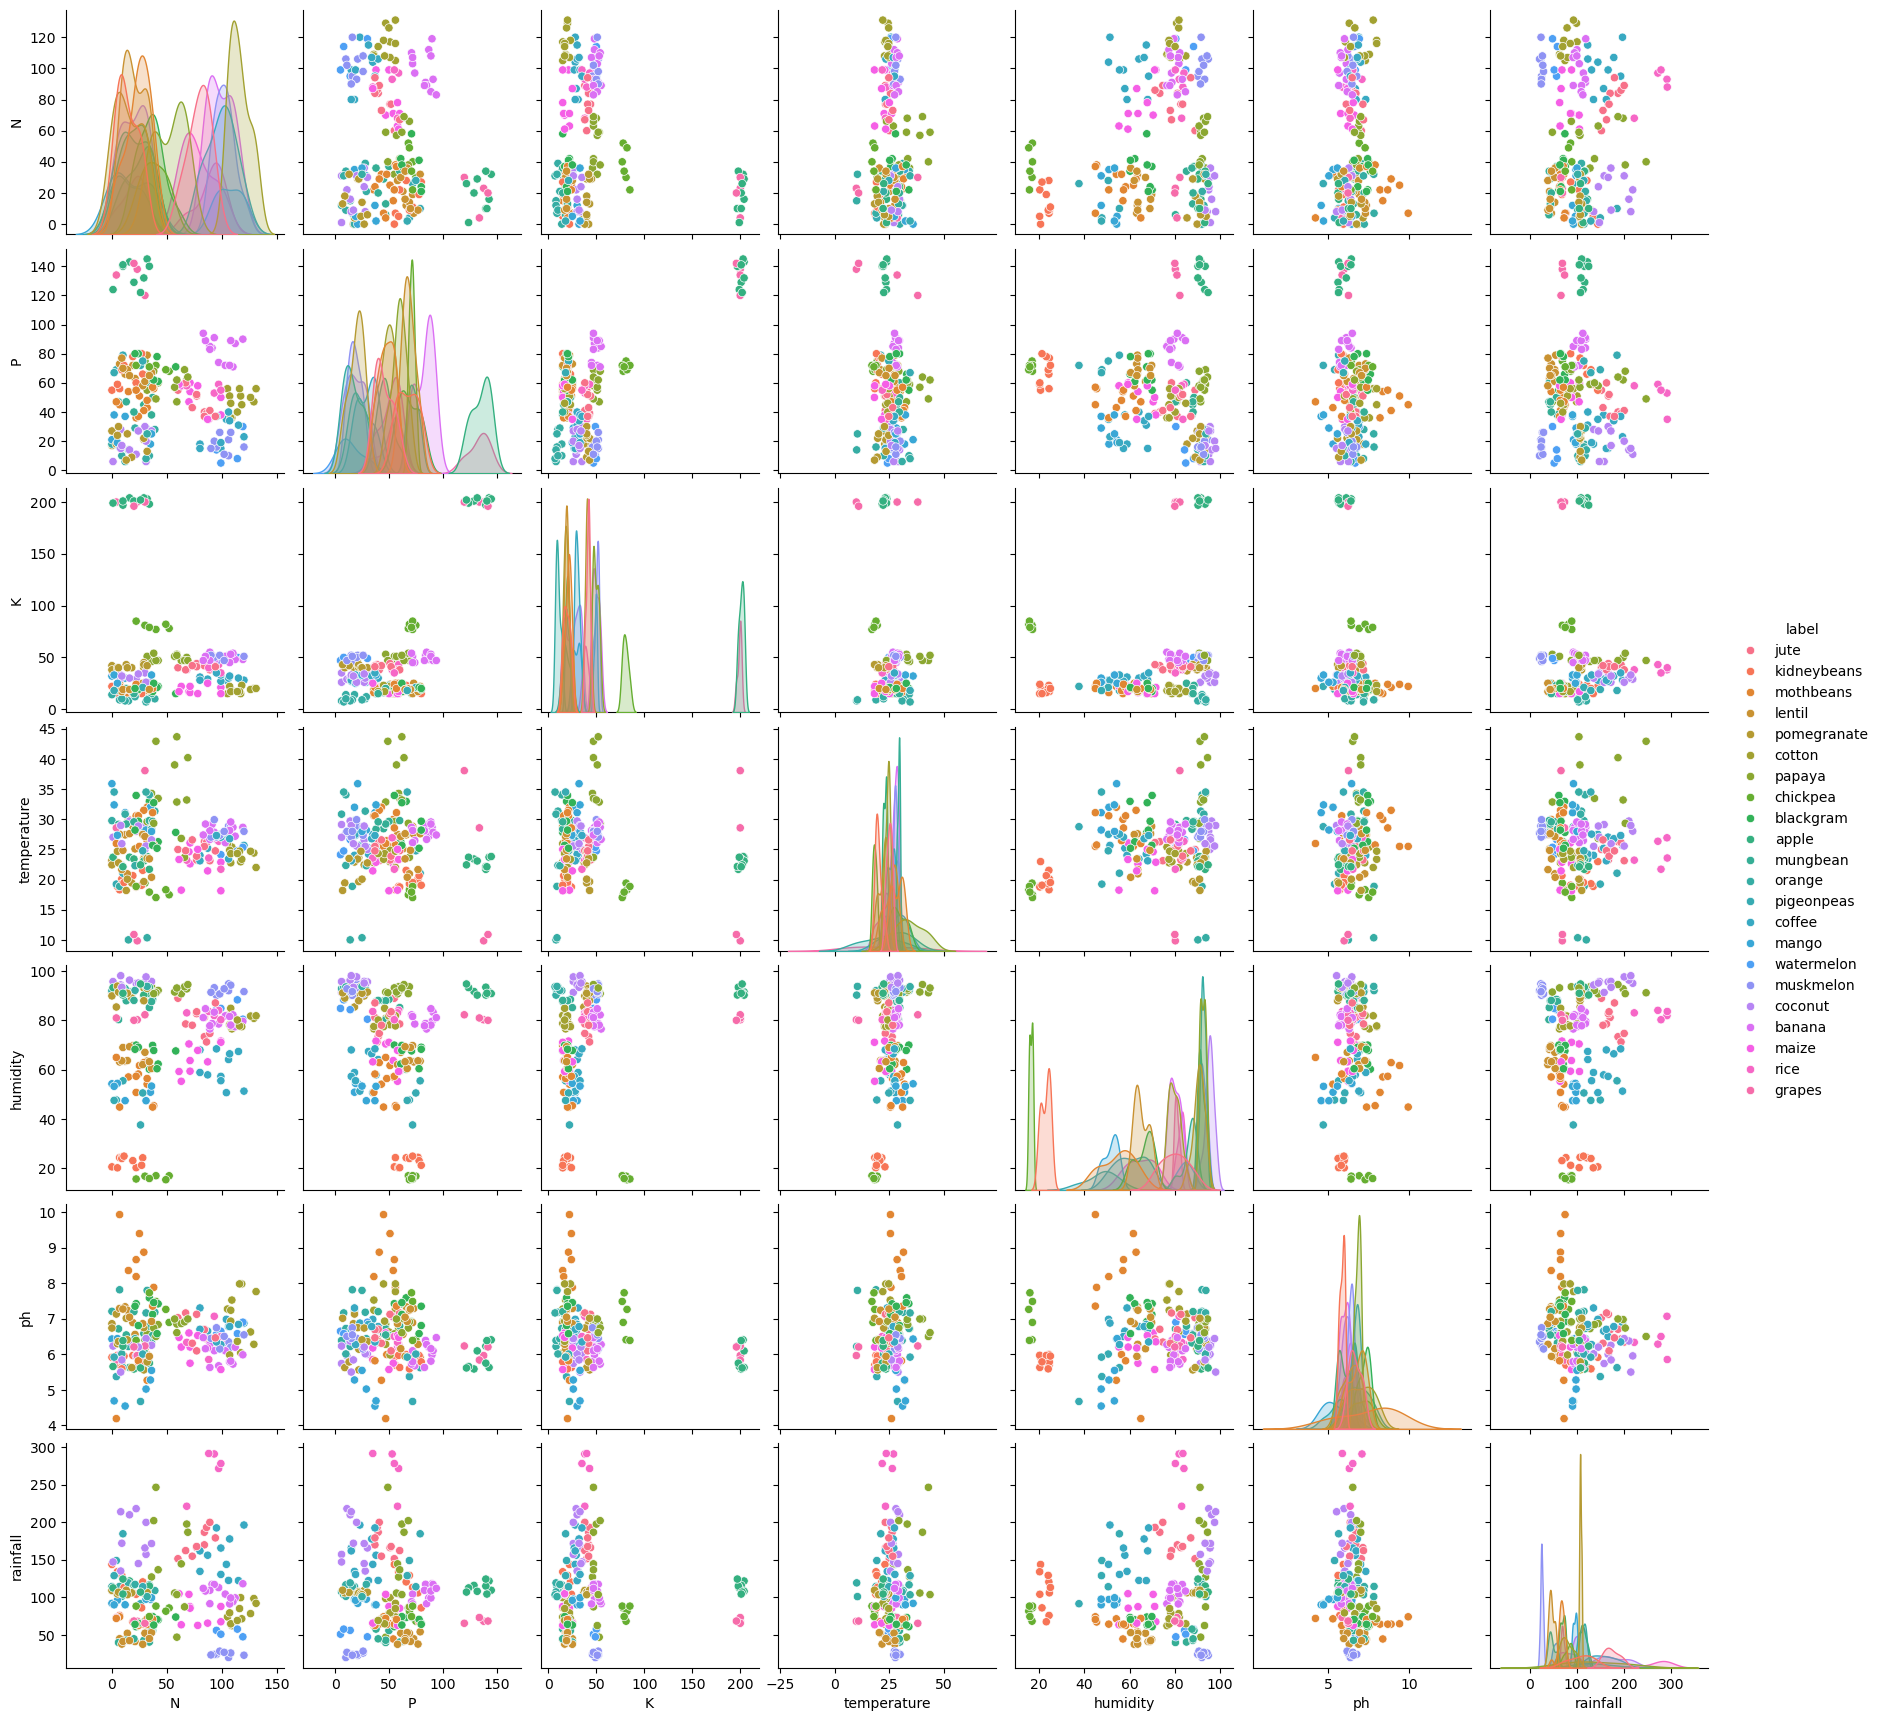

In [22]:
sns.pairplot(data.sample(200), hue='label')
plt.show()

In [23]:
model.predict([[90,42,43,25,80,6.5,200]])


C:\Users\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

In [24]:
model.predict([[10,20,30,18,60,5.5,100]])


C:\Users\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['mango'], dtype=object)

In [25]:
model.predict([[8,15,9,20,82,6.7,180]])


C:\Users\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['orange'], dtype=object)

In [27]:
import pandas as pd

data = pd.read_csv("Crop_recommendation.csv")

data[(data['N']<20) & (data['P']<20) & (data['K']<20) & (data['temperature']<25)]


,N,P,K,temperature,humidity,ph,rainfall,label
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1613,19,7,10,14.780030,91.220621,6.118430,100.196176,orange
1615,9,11,8,24.859034,94.390005,6.559237,111.780373,orange
1618,13,5,8,23.853404,90.105225,7.474711,103.923226,orange
1619,16,8,9,24.602975,91.284087,7.601190,111.294811,orange
1620,4,13,6,15.632110,94.259662,7.561143,101.470570,orange
1627,11,14,5,11.503229,94.893318,6.946355,115.568378,orange
1628,9,8,15,14.343205,94.357347,7.994465,110.222312,orange
1632,8,16,6,12.228162,90.264574,7.106650,108.416171,orange
1633,15,14,8,10.010813,90.223992,6.220943,119.394106,orange
